In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
%matplotlib widget

import torch
import torch.nn as nn
from torchvision.transforms import Resize

from utils import load_segments
from audio.audio_processing import get_spectrum_segment, preprocess_spectrum
from librosa.feature import melspectrogram
import time


from vae import VAE

In [3]:

segment_list = load_segments(file_path='../../monkey_data/segments/June13th_segments.json')

segments = pd.DataFrame(segment_list)
segments.columns = ['start', 'end', 'file']
#"../../monkey_data/Banham/June13th/081014-013.wav"
# TODO
segments['id'] = segments.file.str.replace(r'../monkey_data/Banham/June..../', '').str.replace('.wav', '')



(array([2.700e+01, 0.000e+00, 0.000e+00, 1.440e+02, 0.000e+00, 0.000e+00,
        7.500e+03, 0.000e+00, 0.000e+00, 4.302e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 2.816e+03, 0.000e+00, 0.000e+00, 1.752e+03, 0.000e+00,
        0.000e+00, 1.243e+03, 0.000e+00, 0.000e+00, 9.170e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 6.480e+02, 0.000e+00, 0.000e+00, 4.630e+02,
        0.000e+00, 0.000e+00, 3.330e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        2.700e+02, 0.000e+00, 0.000e+00, 2.320e+02, 0.000e+00, 0.000e+00,
        1.780e+02, 0.000e+00, 0.000e+00, 1.260e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 9.600e+01, 0.000e+00, 0.000e+00, 7.500e+01, 0.000e+00,
        0.000e+00, 6.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 4.800e+01,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 3.700e+01,
        0.000e+00, 0.000e+00, 2.800e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        2.200e+01, 0.000e+00, 0.000e+00, 1.900e+01, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+0

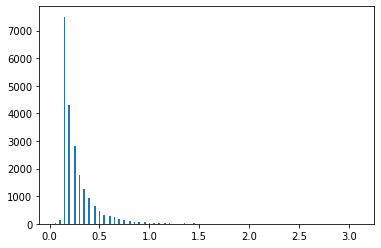

In [4]:
plt.hist(segments['end'] - segments['start'], bins=200)

In [5]:
Z = torch.load('Z.pth').numpy()
X = torch.load('X.pth')
X_features = torch.load('X_features.pth')
y = torch.load('y.pth')

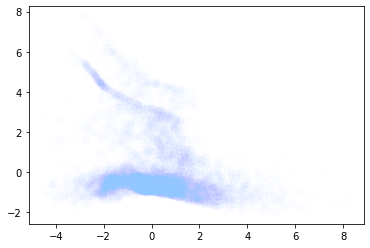

In [6]:

    ###########################################################
    # Plotting

plt.ion(); plt.style.use('seaborn-pastel')

plt.scatter(Z[np.isnan(y.cpu()) == 1, 0], Z[np.isnan(y.cpu()) == 1, 1], alpha=0.01)
plt.scatter(Z[np.isnan(y.cpu()) == 0, 0], Z[np.isnan(y.cpu()) == 0, 1], alpha=0.25)


In [7]:
df = pd.DataFrame(X_features.numpy())

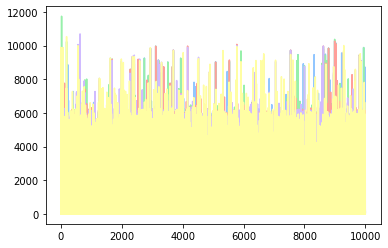

In [8]:
plt.plot(df.loc[:,0:4])
# plt.clf()

(array([5.268e+03, 4.820e+02, 7.200e+01, 6.500e+01, 7.600e+01, 1.420e+02,
        8.700e+01, 1.130e+02, 1.060e+02, 1.040e+02, 1.440e+02, 1.390e+02,
        1.020e+02, 9.200e+01, 7.100e+01, 5.800e+01, 4.200e+01, 3.600e+01,
        2.700e+01, 4.100e+01, 2.400e+01, 2.500e+01, 1.200e+01, 1.800e+01,
        1.300e+01, 1.500e+01, 2.000e+01, 1.000e+01, 6.000e+00, 1.100e+01,
        1.200e+01, 1.200e+01, 1.200e+01, 8.000e+00, 6.000e+00, 1.000e+01,
        1.200e+01, 2.100e+01, 1.000e+01, 1.200e+01, 1.200e+01, 1.000e+01,
        1.100e+01, 1.700e+01, 1.200e+01, 1.300e+01, 1.800e+01, 8.000e+00,
        1.100e+01, 1.200e+01, 4.000e+00, 1.000e+01, 6.000e+00, 4.000e+00,
        7.000e+00, 4.000e+00, 8.000e+00, 3.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 4.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 7.000e+00,
        1.000e+01, 8.000e+00, 8.000e+00, 1.100e+01, 2.100e+01, 2.600e+01,
        3.400e+01, 4.600e+01, 8.600e+01, 1.180e+02, 1.280e+02, 1.510e+02,
        1.340e+02, 1.320e+02, 1.290e+0

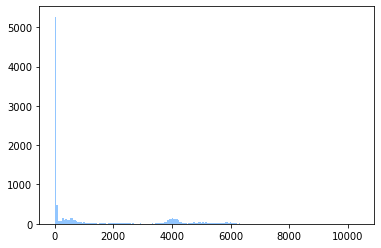

In [9]:
# plt.hist(np.log1p(df[5]), bins=200)
plt.hist(df[5], bins=200)
# plt.xscale('log')

(array([  13.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,   82.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 3924.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2188.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1430.,    0.,    0.,    0.,    0.,    0.,    0.,
      

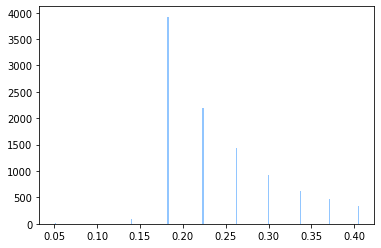

In [10]:
plt.hist(np.log1p(df[6]), bins=200)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   3.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   0.,   1.,   1.,
          2.,   2.,   4.,   2.,   3.,   0.,   5.,   7.,  13.,   7.,   9.,
         13.,  13.,  20.,  26.,  30.,  38.,  56.,  61.,  70.,  82.,  87.,
         99., 117., 127., 114., 119., 117., 120., 128., 146., 119., 175.,
        151., 135., 109., 160., 158., 134., 142., 175., 174., 171., 171.,
        168., 172., 165., 160., 175., 161., 164., 164., 187., 177., 177.,
        154., 163., 150., 155., 154., 183., 157., 143., 166., 149., 127.,
        153., 148., 133., 103., 128., 110., 104., 105.,  81.,  78.,  80.,
        102.,  84.,  62.,  82.,  67.,  72.,  61.,  64.,  52.,  46.,  48.,
         50.,  35.,  43.,  44.,  40.,  38.,  34.,  34.,  28.,  31.,  23.,
         30.,  25.,  22.,  19.,  22.,  21.,  13.,  11.,  16.,   9.,  15.,
         16.,  14.,  19.,  18.,  10., 

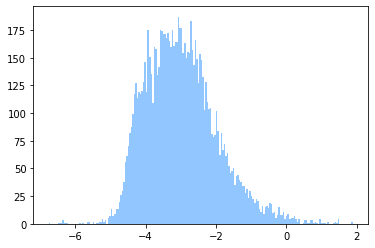

In [11]:
plt.hist(df[7], bins=200)

In [12]:
df[7]

0      -3.909013
1      -3.442427
2      -3.299199
3      -2.616674
4      -2.814859
          ...   
9995   -2.344311
9996   -2.909205
9997   -3.757564
9998   -4.386922
9999   -3.331809
Name: 7, Length: 10000, dtype: float32

In [13]:
!ls

Untitled.ipynb	  callfinder.py		      segments.json
X.pth		  dash			      utils.py
X_features.pth	  dim_reduction.py	      vae.py
Z.pth		  merge_labelled_segments.py  verify_segments.py
__pycache__	  plotting.py		      y.pth
audio		  save_segments.py
call_labeller.py  sd.pth


In [14]:
n_data, n_mels, new_segm_len = 10000, 64, 32 

Z = torch.load('Z.pth').numpy()
dim_reducer = VAE()
dim_reducer.load_state_dict(torch.load('sd.pth'))


<All keys matched successfully>

-----------------

loading data: (496.75, 496.9, '../../monkey_data/Banham/June13th/081014-007.wav')


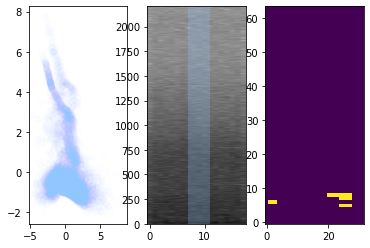

Is this a call? y/n/m/.:
y


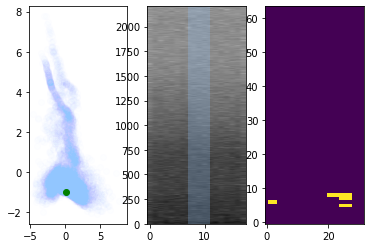

-----------------

loading data: (502.6, 502.75, '../../monkey_data/Banham/June13th/081003-002.wav')


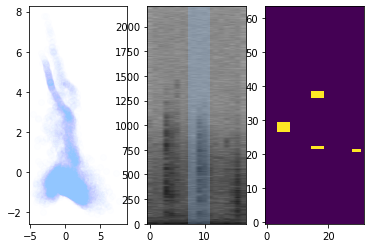

Is this a call? y/n/m/.:
n


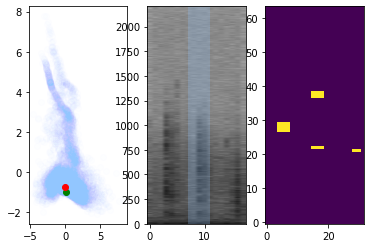

-----------------

loading data: (749.15, 749.6, '../../monkey_data/Banham/June13th/081014-012.wav')


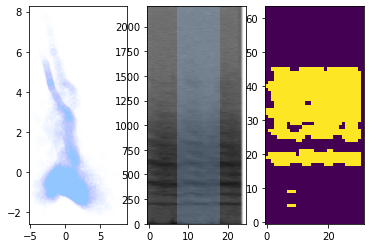

Is this a call? y/n/m/.:
y


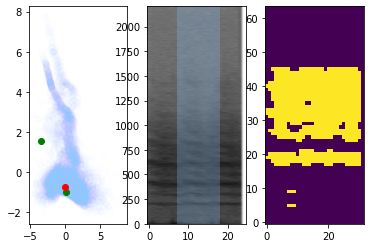

-----------------

loading data: (810.75, 810.95, '../../monkey_data/Banham/June13th/081003-003.wav')


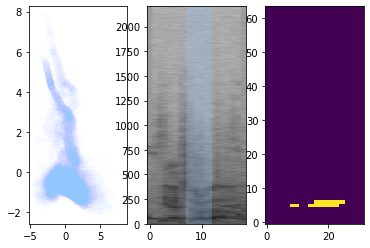

Is this a call? y/n/m/.:
n


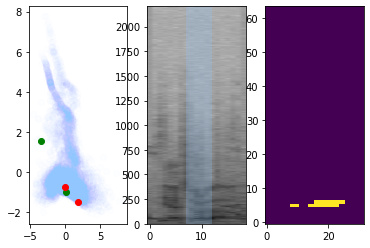

-----------------

loading data: (490.9, 491.25, '../../monkey_data/Banham/June13th/081014-001.wav')


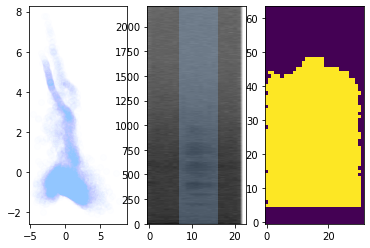

Is this a call? y/n/m/.:
m


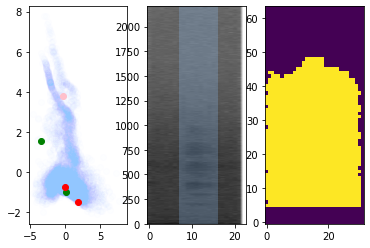

-----------------

loading data: (670.1, 671.05, '../../monkey_data/Banham/June13th/081014-008.wav')


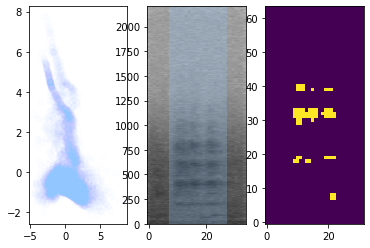

Is this a call? y/n/m/.:
q


KeyError: 'q'

In [53]:
# VAE projection for labelling

records = []
latent_labels=[]

def get_label():
    label = input("Is this a call? y/n/m/.:\n")
    col = dict(y='green', n='red', m='pink')[label]
    if label == 'y' or label == 'Y':
        call_type = input("What call type? 1 (chirp) / 2 (squack) / 3 (shriek of death)")
        if len(call_type) == 1:
            label = label + call_type
        else:
            print("Next time please only give one character answers thanks. Type not recorded.")
    return label, col 
    
def make_plot():
    fig, (axa, axb, axc) = plt.subplots(1, 3)
    axa.scatter(Z[:, 0], Z[:, 1], alpha=0.01)

    axb.imshow(S, aspect='auto', origin='lower', cmap=plt.cm.binary)

    axc.imshow(mel_spec[0, 0].cpu(), aspect='auto', origin='lower')

    rect_start = int(0.35*S.shape[1] / ((end - start) + 2*0.35))
    rect_end = S.shape[1] - rect_start
    axb.add_patch(patches.Rectangle((rect_start, 0), rect_end - rect_start, len(freq), alpha=0.25))
    return fig, axa, axb, axc
    
    
while True:
    idx = np.random.choice(len(segment_list), 1)[0]

    start, end, f = segment_list[idx]
    print(f'-----------------\n')
    print(f'loading data: {segment_list[idx]}')
    S, freq, t = get_spectrum_segment(start, end, f, extension=0.35)
    
    mel_spec = preprocess_spectrum(S, n_mels, new_segm_len)

    latent, _ = dim_reducer(mel_spec)
    latent = latent.loc.cpu().detach()
    
    fig, axa, axb, axc = make_plot()
    plt.show()
    
    label, col = get_label()
    plt.close(fig)
    
    fig, axa, axb, axc = make_plot()
    latent_label = (latent[0, 0], latent[0, 1], col)
    latent_labels.append(latent_label)
    for l in latent_labels:
        axa.scatter(l[0], l[1], c=l[2])
    
    plt.show()
    records.append([start, end, f, label])

In [54]:
records

[[496.75, 496.9, '../../monkey_data/Banham/June13th/081014-007.wav', 'y'],
 [502.6, 502.75, '../../monkey_data/Banham/June13th/081003-002.wav', 'n'],
 [749.15, 749.6, '../../monkey_data/Banham/June13th/081014-012.wav', 'y'],
 [810.75, 810.95, '../../monkey_data/Banham/June13th/081003-003.wav', 'n'],
 [490.9, 491.25, '../../monkey_data/Banham/June13th/081014-001.wav', 'm']]

In [59]:
def save_records(records, filename='records.txt'):
    with open(filename, "w") as f:
        json.dump(records, f)

import json
from datetime import datetime

def read_records(filename):
    with open(filename, "r") as fp:
        b = json.load(fp)
    return b


In [62]:

now = datetime.now() # current date and time

dt = now.strftime("%H%M%S_%d%m%Y")
save_records(records, filename=dt+'_records.txt')


new_records = read_records(dt+'_records.txt')
print(records, "\n", new_records)

[[496.75, 496.9, '../../monkey_data/Banham/June13th/081014-007.wav', 'y'], [502.6, 502.75, '../../monkey_data/Banham/June13th/081003-002.wav', 'n'], [749.15, 749.6, '../../monkey_data/Banham/June13th/081014-012.wav', 'y'], [810.75, 810.95, '../../monkey_data/Banham/June13th/081003-003.wav', 'n'], [490.9, 491.25, '../../monkey_data/Banham/June13th/081014-001.wav', 'm']] 
 [[496.75, 496.9, '../../monkey_data/Banham/June13th/081014-007.wav', 'y'], [502.6, 502.75, '../../monkey_data/Banham/June13th/081003-002.wav', 'n'], [749.15, 749.6, '../../monkey_data/Banham/June13th/081014-012.wav', 'y'], [810.75, 810.95, '../../monkey_data/Banham/June13th/081003-003.wav', 'n'], [490.9, 491.25, '../../monkey_data/Banham/June13th/081014-001.wav', 'm']]


(([], []), ([], []))

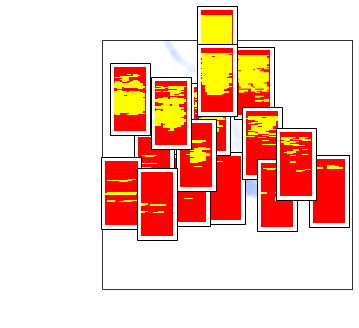

In [19]:
# Display the images on the latent space


from matplotlib import offsetbox

plt.figure()
ax = plt.subplot(aspect='equal')

plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.tight_layout()

ax.scatter(Z[:, 0], Z[:, 1], lw=0, s=40, alpha=0.01)

# idx_to_plot = np.random.choice(np.arange(n_data), 20, replace=False)
shown_images = Z[[0], :]
for i in range(len(Z)):
    if np.square(Z[i] - shown_images).sum(axis=1).min() < 2:
    # if i not in idx_to_plot:
        continue
    plt.scatter(Z[i, 0], Z[i, 1], c='black', alpha=0.7)
    ax.add_artist(offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(X.cpu().numpy()[i, 0], cmap=plt.cm.autumn), Z[i, :]))
    shown_images = np.r_[shown_images, Z[[i], :]]
plt.xticks([]), plt.yticks([])
